# Image Dataset preparation

## 1- Extract images from synchrtron raw files *.nxs file

## 1-0 Extract images from synchrtron raw files *.nxs file (optionnal)

In [ ]:
from extract import extract_nxs_folder
#dossier = "data/nxs"
dossier = "D:/data_saxs_LPS/jl30cercle"
data_eiger, data_pos, data_basler = extract_nxs_folder(dossier,'circle.npy')
print("Eiger :", data_eiger.shape)
print("Pos   :", data_pos.shape)
print("Basler:", data_basler.shape)

## 1-1 Import images from numpy files

### 1-1-1 Load numpy file

In [1]:
import numpy as np
data_eiger = np.load("circle.npy")
print(data_eiger.shape)

(616, 3, 1083, 1035)


### 1-1-2 Select first channel

The dimensions can be read as: (number of images, number of channels, width, height). In this sychrotron run, we took 3 pictures for each position. Let's keep only the first image to avoid repetitions in the dataset.

In [2]:
first_channels = data_eiger[:, 0, :, :] 
print("Original Shape:", data_eiger.shape)
print("First channel only Shape:", first_channels.shape)

# Save the first channel array in the current working directory
np.save("circles_first_channel.npy", first_channels)
print(f"First channel data saved ")

Original Shape: (616, 3, 1083, 1035)
First channel only Shape: (616, 1083, 1035)
First channel data saved 


## 2-1 Explore image format

### 2-1-1 Plot images

Plot first 3 images: 

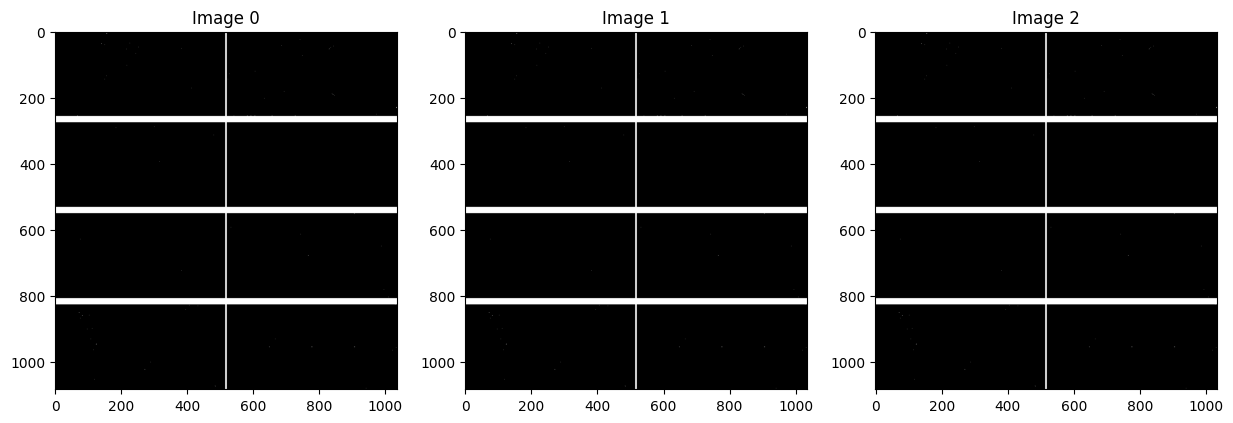

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i in range(3):
    axes[i].imshow(first_channels[i, :, :],cmap='gray')
    axes[i].set_title(f"Image {i}")

No signal visible on images! A usual process on SAXS image is to plot log of images

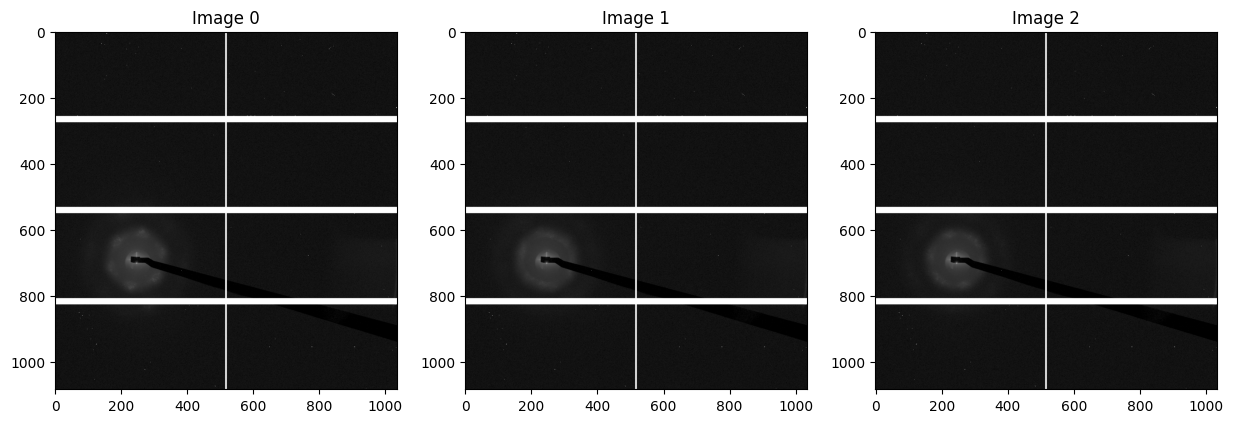

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i in range(3):
    axes[i].imshow(np.log1p(first_channels[i, :, :]),cmap='gray')
    axes[i].set_title(f"Image {i}")

### 2-1-2 Log scale

So far, we just displayed the image in log, but the data were not changed.   
Apply the log to the numpy array.

In [5]:
### Check pixel values:
print(f"Minimal pixel value before log:    {np.min(first_channels[0,:,:])}")
print(f"Minimal pixel value before log:    {np.max(first_channels[0,:,:])}")
print(f"Mean pixel value before log:       {np.mean(first_channels[0,:,:])}")
# Appliquer log1p à toutes les images
data_log = np.log1p(first_channels)
print(f"Minimal pixel value after log:    {np.min(data_log[0,:,:])}")
print(f"Minimal pixel value after log:    {np.max(data_log[0,:,:])}")
print(f"Mean pixel value after log:       {np.mean(data_log[0,:,:])}")

Minimal pixel value before log:    0
Minimal pixel value before log:    4294967295
Mean pixel value before log:       246102197.18832996
Minimal pixel value after log:    0.0
Minimal pixel value after log:    22.18070977791825
Mean pixel value after log:       2.884231803461801


### 2-1-3 Histogram

Plot the histogram of first image

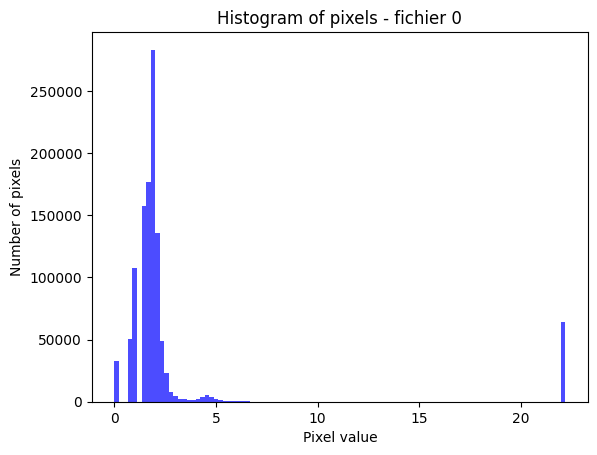

In [6]:
plt.hist(data_log[0,:,:].ravel(), bins=100, color='blue', alpha=0.7)
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.title('Histogram of pixels - fichier 0')
plt.show()

We have few strongs values.  
Try to locate them by plotting red markers on the pixels >20

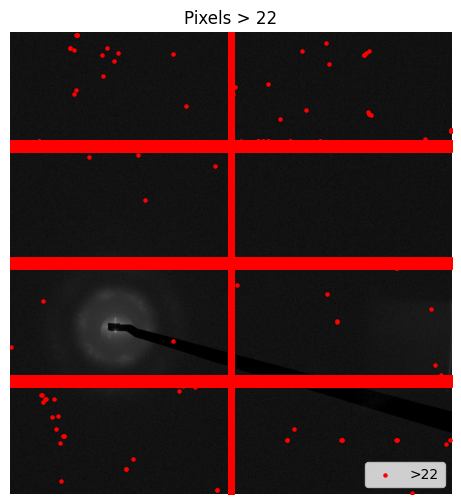

Number of pixels > 22: 64228


In [ ]:
from vizualisation import show_image_with_pixels_over_threshold

show_image_with_pixels_over_threshold(data_log[i,:,:], threshold=22)


We can then localize strong values pixels. But 1 picture is not so representative.  
Display 6 images with as argument 6 randoms index.

In [8]:
import random
# Randomly select 6 indices from the first dimension
n_images = data_eiger.shape[0]
random_indices = random.sample(range(n_images), 6)
print(random_indices)

[528, 326, 250, 67, 543, 291]


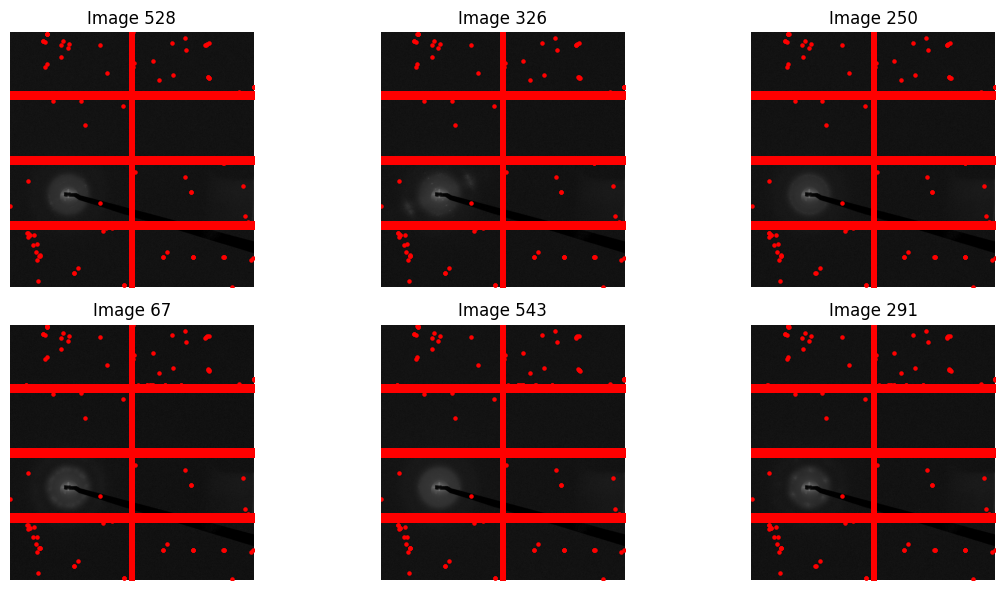

In [16]:
# créer la grille 2x3
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()  # on aplatie pour boucler simplement

for ax, idx in zip(axes, random_indices):
    image = data_log[idx, :, :]   # ton image 2D
    threshold = 22

    # pixels au-dessus du seuil
    coords = np.where(image > threshold)

    # affichage dans l'axe ax
    ax.imshow(image, cmap='gray')
    ax.scatter(coords[1], coords[0], color='red', s=5, marker='o')
    ax.set_title(f"Image {idx}", fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

Strong values pixels have 2 origins:  
- The frames (space betwwen parts of the detector)  
- Specific pixels  
The majority of the signal is in the same frame. Always with the idea of keeping information and making the dataset lighter, we will crop the image. 
- Do a function to check if on all the images the spot is at the same region


In [20]:
from vizualisation import create_video_from_images

create_video_from_images(data_log, 'circles.mp4', fps=6)

Creating video with 616 frames at 6 FPS...
Processed frame 1/616
Processed frame 5/616
Processed frame 10/616
Processed frame 15/616
Processed frame 20/616
Processed frame 25/616
Processed frame 30/616
Processed frame 35/616
Processed frame 40/616
Processed frame 45/616
Processed frame 50/616
Processed frame 55/616
Processed frame 60/616
Processed frame 65/616
Processed frame 70/616
Processed frame 75/616
Processed frame 80/616
Processed frame 85/616
Processed frame 90/616
Processed frame 95/616
Processed frame 100/616
Processed frame 105/616
Processed frame 110/616
Processed frame 115/616
Processed frame 120/616
Processed frame 125/616
Processed frame 130/616
Processed frame 135/616
Processed frame 140/616
Processed frame 145/616
Processed frame 150/616
Processed frame 155/616
Processed frame 160/616
Processed frame 165/616
Processed frame 170/616
Processed frame 175/616
Processed frame 180/616
Processed frame 185/616
Processed frame 190/616
Processed frame 195/616
Processed frame 200

- Plot image number zero and crop it to keep only the part with signal.

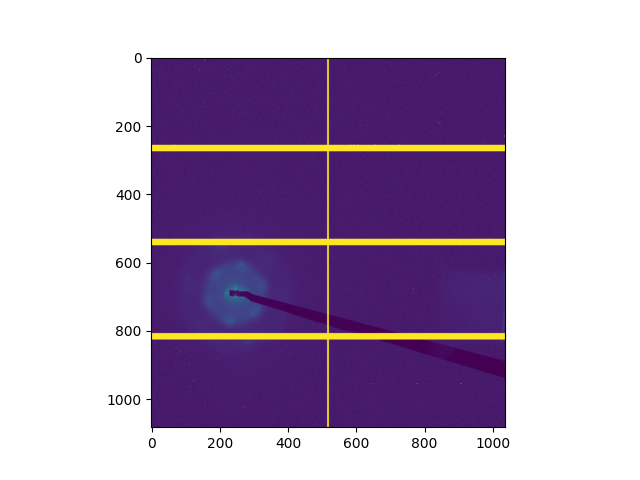

In [21]:
%matplotlib widget
fig, ax = plt.subplots()
ax.imshow(data_log[0,:, :])


Visually select x and y ranges

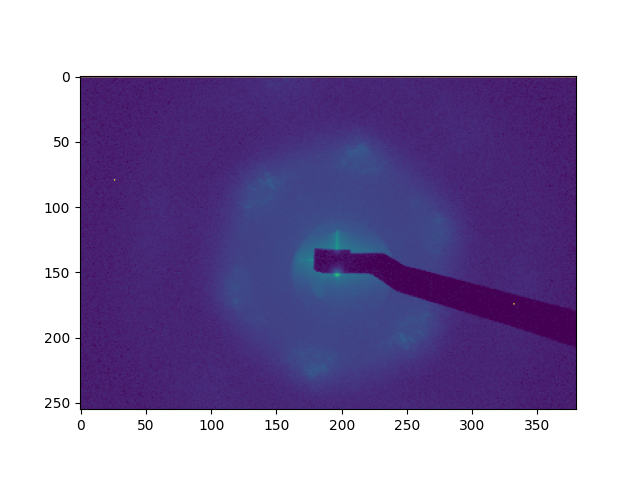

In [22]:
fig, ax = plt.subplots()
ax.imshow(data_log[0,550:805, 50:430])

And apply to the dataset

In [23]:
data_crop = data_log[:,555:805, 55:425]
print("Before Crop :", data_log.shape)
print("After Crop :", data_crop.shape)

Before Crop : (616, 1083, 1035)
After Crop : (616, 250, 370)


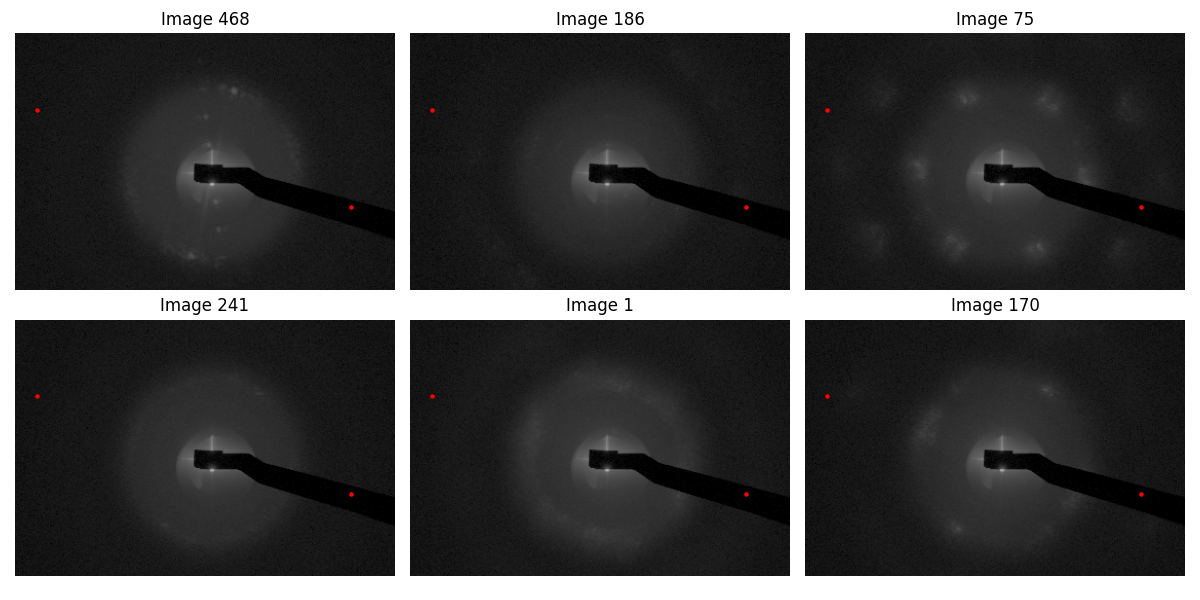

In [26]:
# créer la grille 2x3
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()  # on aplatie pour boucler simplement

for ax, idx in zip(axes, random_indices):
    image = data_crop[idx, :, :]   # ton image 2D
    threshold = 22

    # pixels au-dessus du seuil
    coords = np.where(image > threshold)

    # affichage dans l'axe ax
    ax.imshow(image, cmap='gray')
    ax.scatter(coords[1], coords[0], color='red', s=5, marker='o')
    ax.set_title(f"Image {idx}", fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

Continuer avec multi histgrammes

In [24]:
# import numpy as np
# import matplotlib.pyplot as plt
# import random

# # Randomly select 6 indices from the first dimension
# n_images = data_log .shape[0]
# random_indices = random.sample(range(n_images), 6)

# print("Randomly selected indices:", sorted(random_indices))

# # Create 2x3 subplots
# fig, axes = plt.subplots(2, 3, figsize=(14, 6))

# # Display histograms for each selected image
# for i, idx in enumerate(random_indices):
#     row = i // 3  # Row (0 or 1)
#     col = i % 3   # Column (0, 1 or 2)
    
#     # Get the corresponding image data
#     image_data = data_log[idx, :, :]
    
#     # Create histogram
#     axes[row, col].hist(image_data.ravel(), bins=100, color='blue', alpha=0.7, edgecolor='black')
#     axes[row, col].set_xlabel('Pixel Value')
#     axes[row, col].set_ylabel('Number of Pixels')
#     axes[row, col].set_title(f'Image {idx}\nMin: {np.min(image_data):.1f}, Max: {np.max(image_data):.1f}')
#     axes[row, col].grid(alpha=0.3)

# # Adjust spacing between subplots
# plt.tight_layout()
# plt.subplots_adjust(top=0.9)  # Make space for main title
# plt.show()

# # Display detailed statistics in console
# print("\n=== DETAILED STATISTICS ===")
# for idx in random_indices:
#     image_data = data_log [idx, :, :]
#     print(f"Image {idx}: Min={np.min(image_data):.1f}, Max={np.max(image_data):.1f}, Mean={np.mean(image_data):.1f}, Median={np.median(image_data):.1f}")
#     count_over_20 = np.sum(image_data > 20)
#     print(f"Image {idx} : {count_over_20} pixels > 20")

import numpy as np
import matplotlib.pyplot as plt

def multi_histograms(random_indices, data, threshold=20):
    """
    Affiche les histogrammes des images de data aux indices random_indices
    et imprime le nombre de pixels > threshold.
    """
    fig, axes = plt.subplots(2, 3, figsize=(14, 6))

    for i, idx in enumerate(random_indices):
        row = i // 3
        col = i % 3

        image_data = data[idx, :, :]

        # Histogramme des valeurs
        axes[row, col].hist(
            image_data.ravel(), bins=100, color='blue', alpha=0.7, edgecolor='black'
        )
        axes[row, col].set_xlabel('Pixel Value')
        axes[row, col].set_ylabel('Number of Pixels')
        axes[row, col].set_title(
            f'Image {idx}\nMin: {np.min(image_data):.1f}, Max: {np.max(image_data):.1f}'
        )
        axes[row, col].grid(alpha=0.3)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Comptage des pixels > threshold
    print(f"\n=== COMPTE DES PIXELS > {threshold} ===")
    for idx in random_indices:
        image_data = data[idx, :, :]
        count_over_thr = np.sum(image_data > threshold)
        print(f"Image {idx} : {count_over_thr} pixels > {threshold}")

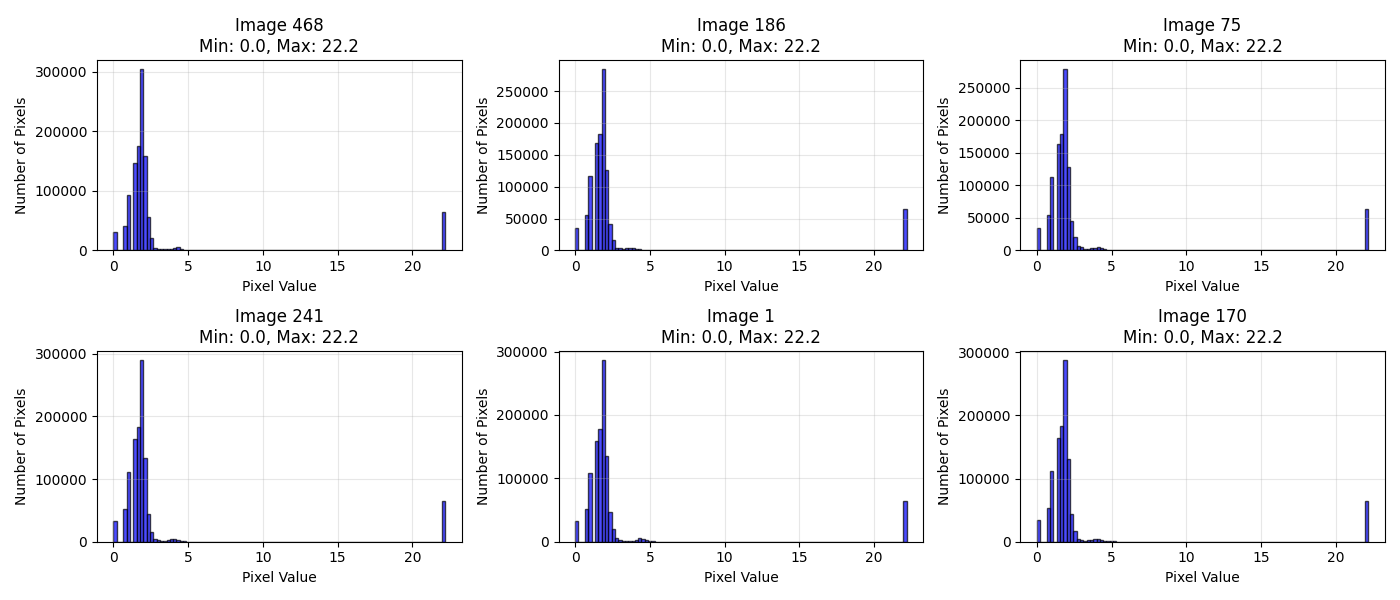


=== COMPTE DES PIXELS > 15 ===
Image 468 : 64229 pixels > 15
Image 186 : 64229 pixels > 15
Image 75 : 64229 pixels > 15
Image 241 : 64229 pixels > 15
Image 1 : 64229 pixels > 15
Image 170 : 64229 pixels > 15


In [25]:
import random
# Randomly select 6 indices from the first dimension
n_images = data_eiger.shape[0]
random_indices = random.sample(range(n_images), 6)
threshold=15

multi_histograms(random_indices, data_log, threshold=threshold)

In [ ]:



fig, axes = plt.subplots(2, 3, figsize=(14, 6))

for i, idx in enumerate(random_indices):
    row = i // 3
    col = i % 3
    
    # Masque des pixels > 20
    mask = data_log[idx, :, :] > 20

    # Affiche le masque (pixels >20 en rouge, le reste transparent)
    axes[row, col].imshow(mask, cmap='gray')#, interpolation='none')
    axes[row, col].set_title(f'Image {idx} – pixels > 20')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


Then we can see, high value pixels are the grid (corresponding to the limits of the frames of the detector). If we check the video, it seems we can kee only 1 frame with the pattern. Let's crop the image.

In [ ]:
%matplotlib widget
fig, ax = plt.subplots()
#ax.imshow(np.log1p(data_log[0,:,:]))
ax.imshow(data_log[0,:,:])

In [ ]:
%matplotlib widget
fig, ax = plt.subplots()
ax.imshow(data_log[0,550:805, 50:430])


In [ ]:
#data_crop = data_log[:,550:805, 50:430]

#data_crop = data_log[:,555:805, 50:430]
data_crop = data_log[:,555:805, 55:425]
print("Before Crop :", data_log.shape)
print("After Crop :", data_crop.shape)

In [ ]:
multi_histograms(random_indices, data_crop, threshold=threshold)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_image_with_pixels_over_threshold(image, threshold=20):
    """
    Affiche une image 2D avec les pixels > threshold marqués en rouge.

    Paramètres
    ----------
    image : np.ndarray
        Image 2D (height, width)
    threshold : float
        Seuil pour repérer les pixels
    """
    # Trouver les coordonnées des pixels > threshold
    coords = np.where(image > threshold)  # (rows, cols)

    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.scatter(coords[1], coords[0], color='red', s=30, marker='o', label=f'>{threshold}')
    plt.title(f'Pixels > {threshold}')
    plt.axis('off')
    plt.legend()
    plt.show()

    # On imprime le nombre de pixels au-dessus du seuil
    print(f"Nombre de pixels > {threshold} : {len(coords[0])}")


In [ ]:
for i in random_indices:
    print(data_crop[i,:,:].shape)
    show_image_with_pixels_over_threshold(data_crop[i,:,:], threshold=threshold)

In [ ]:
# import numpy as np

# def replace_pixels_stack_above_threshold(data, threshold=20):
#     """
#     Remplace pour chaque image du stack les pixels > threshold
#     par la 2e plus grande valeur de cette image.

#     Paramètres
#     ----------
#     data : np.ndarray (n_images, height, width)
#         Stack d'images
#     threshold : float
#         Seuil

#     Retour
#     ------
#     data_mod : np.ndarray
#         Stack d'images modifié
#     """
#     data_mod = np.empty_like(data)

#     for i in range(data.shape[0]):
#         img = data[i].copy()
#         unique_vals = np.unique(img)
#         if unique_vals.size < 2:
#             second_max = unique_vals[0]
#         else:
#             second_max = unique_vals[-2]
#         img[img > threshold] = second_max
#         data_mod[i] = img

#     return data_mod


In [ ]:
import numpy as np

import numpy as np

def replace_max_pixels(image):
    """
    Remplace les pixels de valeur maximale dans une image 2D
    par la 2e plus grande valeur de l'image.

    Paramètres
    ----------
    image : np.ndarray
        Image 2D

    Retour
    ------
    image_mod : np.ndarray
        Image modifiée
    """
    image_mod = image.copy()
    max_val = image_mod.max()

    unique_vals = np.unique(image_mod)
    if unique_vals.size < 2:
        second_max = max_val  # pas de 2e valeur → on garde max
    else:
        second_max = unique_vals[-2]

    image_mod[image_mod == max_val] = second_max
    return image_mod



In [ ]:
# data_remove_max = replace_pixels_stack_above_threshold(data_crop, threshold=20)
# stack d'images
data_remove_max = np.empty_like(data_crop)

# for i in range(data_crop.shape[0]):
#     data_remove_max[i] = replace_max_pixels(data_crop[i])
data_remove_max = np.empty_like(data_crop)

for i in range(data_crop.shape[0]):
    img = data_crop[i].copy()
    while np.any(img > 10):
        img = replace_max_pixels(img)
    data_remove_max[i] = img


    
multi_histograms(random_indices, data_remove_max , threshold=10)

In [ ]:
## diminuer la taille des images

print(data_remove_max.shape)
factor = 2

n_images, h, w = data_remove_max.shape
new_h = h // factor
new_w = w // factor

data_resized = np.array([
    cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA) 
    for img in data_remove_max
])
print(data_resized.shape) 


In [ ]:
for i in random_indices:
 
    show_image_with_pixels_over_threshold(data_remove_max[i,:,:], threshold=10)